# Zalamakwana Sheshang N

# Level 3
## Task 1: Restaurant Reviews
### Analyze the text reviews to identify the most common positive and negative keywords.
### Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Zala
[nltk_data]     Sheshang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zala
[nltk_data]     Sheshang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Import Essential Libraries and Dataset

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# importing Dataset
df = pd.read_csv("C:\\Users\\Zala Sheshang\\Desktop\\Cognifyz_Internship\\Dataset .csv")

In [3]:
# Find out Review text (Rating text)
reviews = df['Rating text']
reviews

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

# 2. most common positive and negative keywords.

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Zala
[nltk_data]     Sheshang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df['Review text'] = df['Rating text'].fillna('')

In [6]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [7]:
def get_sentiment_score(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = reviews.apply(get_sentiment_score)
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 'Positive' if score >= 0 else 'Negative')


In [8]:
positive_keywords = {}
negative_keywords = {}

stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    words = nltk.word_tokenize(row['Review text'].lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    for word in filtered_words:
        if row['Sentiment'] == 'Positive':
            positive_keywords[word] = positive_keywords.get(word, 0) + 1
        else:
            negative_keywords[word] = negative_keywords.get(word, 0) + 1
print("\nStop Words\n",stop_words)
print("\nPositive words\n", positive_keywords)
print("\nNegative Words\n",negative_keywords)


Stop Words
 {'to', 'such', 'she', 'and', 'here', 'weren', 'your', 'themselves', 'do', 'above', "shan't", 'until', "that'll", "she's", 'o', 'who', 'which', "couldn't", 'him', 'than', 'whom', 'shan', "doesn't", 'now', 'i', 'a', 'd', 'hers', 'same', 'won', 'or', 'hadn', 'ours', 'them', 'into', 'before', 'haven', "weren't", 'no', 'after', 'why', 'they', 'y', 'yourself', 'where', 'can', 'because', 'this', 'most', "won't", 'his', 'had', 'further', "aren't", 'herself', "haven't", 'shouldn', 'he', 'mustn', 've', 'ourselves', 'that', "you're", 'yours', "needn't", 'we', 'an', 'isn', 'its', 'mightn', 'about', "you'd", 'should', "mustn't", 'once', 's', 'the', 'some', 'will', 'more', 'of', 'these', 'was', 'being', 'from', 'but', 'having', 'all', "hasn't", "shouldn't", 're', 'needn', 'below', 'me', 'through', 'just', 'it', 'is', 'if', 'then', "wouldn't", 'itself', 'those', 'be', 'other', 'under', 'couldn', 'aren', 'up', 'there', 'wouldn', 'in', 'ma', 'over', 'against', 'their', 'ain', 'few', 'their

In [9]:
top_positive_keywords = dict(sorted(positive_keywords.items(), key=lambda item: item[1], reverse=True)[:10])
top_negative_keywords = dict(sorted(negative_keywords.items(), key=lambda item: item[1], reverse=True)[:10])


print("\nTop Positive Keywords:\n", top_positive_keywords)
print("\nTop Negative Keywords:\n", top_negative_keywords)


Top Positive Keywords:
 {'average': 3737, 'good': 3179, 'rated': 2148, 'excellent': 301}

Top Negative Keywords:
 {'poor': 186}


# 3. Average length of reviews

In [10]:
df['Review Length'] = df['Review text'].apply(lambda x: len(nltk.word_tokenize(x)))
average_review_length = df['Review Length'].mean()
print("\nAverage Length of Reviews:\n", average_review_length)


Average Length of Reviews:
 1.3378703800649148


# 4. Relationship between review length and rating

In [11]:
df['Rating color'] = pd.to_numeric(df['Rating color'], errors='coerce')

In [12]:
average_length_by_rating = df.groupby('Rating color')['Review Length'].mean()

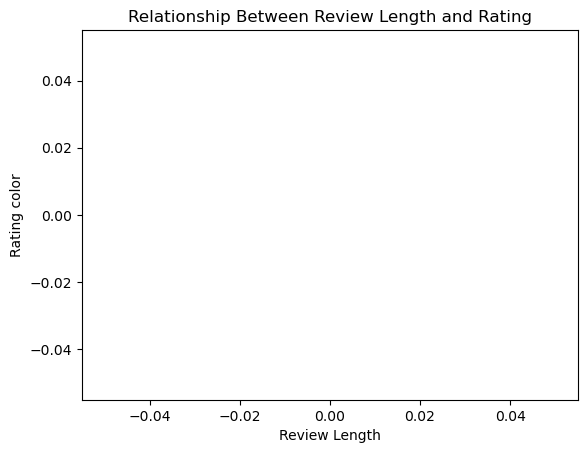

In [13]:
plt.scatter(df['Review Length'], df['Rating color'])
plt.xlabel('Review Length')
plt.ylabel('Rating color')
plt.title('Relationship Between Review Length and Rating')
plt.show()

In [14]:
correlation_coefficient = df['Review Length'].corr(df['Rating color'])
print("\nRelationship between Review Length and Rating:", correlation_coefficient)


Relationship between Review Length and Rating: nan
